In [1]:
import numpy as np
import pandas as pd
%matplotlib inline

from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt


import random
from pprint import pprint
import os
os.chdir("C:/Users/androgo/Downloads/Malmo univaersity/Artificial intelligence for data science-HT20/hand-in/shoppersMlProject")

from data_cleaning_functions import read_data, encode_label, standardize, remove_outliers
from framework_utils import forest_train_test_split, calculate_accuracy
from decision_forest_algorithms import forest_predict

In [2]:
data_frame = read_data()
encode_label(data_frame)
data_frame_scaled = standardize(data_frame)
remove_outliers(data_frame_scaled)
data = data_frame_scaled.copy() # make a copy because data_frame_scaled gets modified by the forest algorithms

#now use only data_frame_scaled

1.203010025435482
0.4405793194981748
0.0
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan
nan


Random Forest Start

Accuracy Random Forest = 0.873331162487789


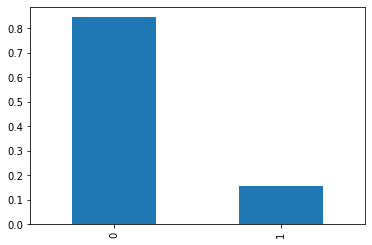

In [3]:
#We predict Revenue

forest_predict(data_frame_scaled)

Random Forest finished

In [4]:
X = data
X = X.drop(['Revenue'], axis=1); #Axis = 0 drops row and Axis=1 drops column
y = data['Revenue']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state = 211)

In [6]:
from sklearn.model_selection import GridSearchCV
'''
param_grid = {
    'n_estimators' : [60,75,90,115,130],
    'max_depth' : [7,14,21,28],
    'min_samples_leaf' : [1,2,3,4],
    'min_samples_split': [2,4,6,8]
}
gridsearch = GridSearchCV(estimator=rfclf,param_grid=param_grid,verbose = 1)
gridsearch.fit(x,y)
''';

# K-Nearest Neighbors

In [7]:
from sklearn.neighbors import KNeighborsClassifier

num_neighbors = []
accuracy = []

for i in range(1,12):
    
    
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train, y_train)
    acc = model.score(X_test, y_test)
    print("Neighbors: {}, test set accuracy: {}".format(i, acc))
    
    num_neighbors.append(i)
    accuracy.append(acc)
    

Neighbors: 1, test set accuracy: 0.8385345997286295
Neighbors: 2, test set accuracy: 0.8637720488466757
Neighbors: 3, test set accuracy: 0.8659430122116689
Neighbors: 4, test set accuracy: 0.8694708276797829
Neighbors: 5, test set accuracy: 0.8667571234735414
Neighbors: 6, test set accuracy: 0.8713704206241519
Neighbors: 7, test set accuracy: 0.8708276797829037
Neighbors: 8, test set accuracy: 0.8705563093622795
Neighbors: 9, test set accuracy: 0.8719131614654003
Neighbors: 10, test set accuracy: 0.8740841248303934
Neighbors: 11, test set accuracy: 0.8740841248303934


10 Neighbors optimal


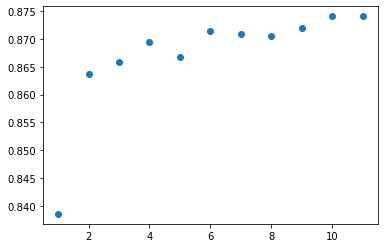

In [8]:
plt.scatter(num_neighbors, accuracy)
print("10 Neighbors optimal")